Suicide is ubiquitous across the globe. According to WHO (World Health Organisation), there is around seven hundred thousand people committed suicides every year globally. It indicates that approximately four-fifths of worldwide suicides took place in those low- and middle-income countries. Some findings put forth the idea that suicide is one of the leading causes of death among younger generation, and such suicide density for men is twice as high as women. The following analysis seeks to find out the relationship between GDP per capita and suicide density. The question whether country with higher GDP per capita have a relatively low suicide density will be answered.

To answer the question on whether country with higher GDP per capita would have a low suicide density, the following objectives will be covered:
Firstly, a comprehensive and tidy dataset must be generated, thorough wrangling different datasets into their common form to merge them into one single big dataset and tackle with the missing values. Secondly, the worldwide suicide density and worldwide GDP per capita must be demonstrated in terms of world map for the data visualization. Thirdly, different models can be applied to the data with respect to the graphical analysis to investigate the relationship between GDP per capita and suicide density. Fourthly, there will be a thorough analysis based on those high-quality plots, graphs, and table. Hypothesis testing will be conducted for the analysis to examine if there is any correlation between the two variables. Finally, the limitation of this analysis will also be covered.

H0: The GDP per Capita variable and Suicide Density are independent.
H1: These two variables relate to each other.


In [1]:
install.packages('tmap')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘widgetframe’, ‘leafsync’




In [2]:
library(readr)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(data.table)
library(countrycode)
library(sp)
library(tmap)   
library(sf)     
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1; sf_use_s2() is TRUE


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Data Wrangling

In [3]:
suicide_stats <- read_csv("../input/who-suicide-statistics/who_suicide_statistics.csv")
head(suicide_stats)

suicide_stats1 <- subset(suicide_stats,suicide_stats$year >= 2001)
head(suicide_stats1)
str(suicide_stats1)
summary(suicide_stats1)

# Filter the data -> remove NA
suicide_stats1 <- na.omit(suicide_stats1)

# GDP dataset wrangling
wgdp <- read_csv("../input/gdp-ppp-per-capita-1990-2017/GDP(PPP) Per capita 1990-2017.csv",  show_col_types = FALSE)
wgdp1 <- wgdp %>% select("Country Name", c("2001" : "2015"))
str(wgdp1)

# Create a Year column 
wgdp2 <- wgdp1 %>% gather(c("2001":"2015"), key = "Year", value = "GDP")
head(wgdp2)

# Convert Year into factor before merging the datasets
suicide_stats1[,"year"] <- as.factor(suicide_stats1$year)
levels(suicide_stats1$year)
wgdp2[,"Year"] <- as.factor(wgdp2$Year)
levels(wgdp2$Year)

# Merge two datasets into one, wgdp_suicide
wgdp_suicide <- suicide_stats1 %>%
  left_join(wgdp2, . , by = c("Country Name" = "country", "Year" = "year"))
head(wgdp_suicide)

wgdp_suicide$age = gsub(pattern = "Year", replacement = "", x = wgdp_suicide$age)
table(wgdp_suicide$age)

# Convert Sex and Age into factor
wgdp_suicide$sex <- as.factor(wgdp_suicide$sex)
wgdp_suicide$age <- as.factor(wgdp_suicide$age)

# Create plot on suicides
wgdp_suicide$Year <- as.numeric(as.character(wgdp_suicide$Year))

# Rename Country Name as country
wgdp_suicide <- rename(wgdp_suicide, c("country" = "Country Name"))
wgdp_suicide <- rename(wgdp_suicide, c("year" = "Year"))

# Data Mutate
wgdp_suicide <- mutate(wgdp_suicide, 
                        Suicide_Density  = (suicides_no/population*100000), 
                        GDP_per_capita_log = log10(GDP))

# Create a Region column by categorizing country into region
wgdp_suicide$region <- countrycode(sourcevar = wgdp_suicide$country,
                            origin = "country.name",
                            destination = "region")

# Filter the data -> remove NA
wgdp_suicide <- na.omit(wgdp_suicide)

# Fill in missing country codes manually
wgdp_suicide$code = countrycode(sourcevar = wgdp_suicide$country,
                                  origin = "country.name",
                                  destination = "iso3c")
wgdp_suicide$code[is.na(wgdp_suicide$code)] = "USA"

Rows: 43776 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): country, sex, age
dbl (3): year, suicides_no, population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,year,sex,age,suicides_no,population
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Albania,1985,female,15-24 years,NA,277900
Albania,1985,female,25-34 years,NA,246800
Albania,1985,female,35-54 years,NA,267500
Albania,1985,female,5-14 years,NA,298300
Albania,1985,female,55-74 years,NA,138700
Albania,1985,female,75+ years,NA,34200


country,year,sex,age,suicides_no,population
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Albania,2001,female,15-24 years,9,271359
Albania,2001,female,25-34 years,4,222771
Albania,2001,female,35-54 years,12,370191
Albania,2001,female,5-14 years,2,307356
Albania,2001,female,55-74 years,6,189799
Albania,2001,female,75+ years,2,47254


tibble [20,448 × 6] (S3: tbl_df/tbl/data.frame)
 $ country    : chr [1:20448] "Albania" "Albania" "Albania" "Albania" ...
 $ year       : num [1:20448] 2001 2001 2001 2001 2001 ...
 $ sex        : chr [1:20448] "female" "female" "female" "female" ...
 $ age        : chr [1:20448] "15-24 years" "25-34 years" "35-54 years" "5-14 years" ...
 $ suicides_no: num [1:20448] 9 4 12 2 6 2 10 22 34 6 ...
 $ population : num [1:20448] 271359 222771 370191 307356 189799 ...


   country               year          sex                age           
 Length:20448       Min.   :2001   Length:20448       Length:20448      
 Class :character   1st Qu.:2004   Class :character   Class :character  
 Mode  :character   Median :2008   Mode  :character   Mode  :character  
                    Mean   :2008                                        
                    3rd Qu.:2012                                        
                    Max.   :2016                                        
                                                                        
  suicides_no        population      
 Min.   :    0.0   Min.   :     259  
 1st Qu.:    1.0   1st Qu.:   64566  
 Median :   11.0   Median :  359388  
 Mean   :  180.9   Mean   : 1721748  
 3rd Qu.:   81.0   3rd Qu.: 1336786  
 Max.   :21262.0   Max.   :43805214  
 NA's   :444       NA's   :2700      

tibble [264 × 16] (S3: tbl_df/tbl/data.frame)
 $ Country Name: chr [1:264] "Aruba" "Afghanistan" "Angola" "Albania" ...
 $ 2001        : num [1:264] 32011 NA 3174 4301 NA ...
 $ 2002        : num [1:264] 30745 860 3540 4661 NA ...
 $ 2003        : num [1:264] 31311 910 3590 4995 NA ...
 $ 2004        : num [1:264] 34112 906 3949 5423 NA ...
 $ 2005        : num [1:264] 35176 1001 4523 5865 NA ...
 $ 2006        : num [1:264] 36347 1053 5019 6560 NA ...
 $ 2007        : num [1:264] 37840 1197 5668 7276 NA ...
 $ 2008        : num [1:264] 38497 1237 6200 8228 NA ...
 $ 2009        : num [1:264] 34675 1474 6080 8815 NA ...
 $ 2010        : num [1:264] 33733 1659 6227 9628 NA ...
 $ 2011        : num [1:264] 35490 1649 6347 10208 NA ...
 $ 2012        : num [1:264] 35493 1834 6776 10526 NA ...
 $ 2013        : num [1:264] 37410 1907 6985 10571 NA ...
 $ 2014        : num [1:264] 38216 1933 7205 11259 NA ...
 $ 2015        : num [1:264] 38249 1925 7103 11662 NA ...


Country Name,Year,GDP
<chr>,<chr>,<dbl>
Aruba,2001,32011.104
Afghanistan,2001,NA
Angola,2001,3173.628
Albania,2001,4301.326
Andorra,2001,NA
Arab World,2001,9509.009


[1] "2001" "2002" "2003" "2004" "2005" "2006" "2007" "2008" "2009" "2010"
[11] "2011" "2012" "2013" "2014" "2015" "2016"

[1] "2001" "2002" "2003" "2004" "2005" "2006" "2007" "2008" "2009" "2010"
[11] "2011" "2012" "2013" "2014" "2015"

Country Name,Year,GDP,sex,age,suicides_no,population
<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Aruba,2001,32011.1,female,15-24 years,0,5897
Aruba,2001,32011.1,female,25-34 years,0,7290
Aruba,2001,32011.1,female,35-54 years,0,16210
Aruba,2001,32011.1,female,5-14 years,0,7181
Aruba,2001,32011.1,female,55-74 years,0,6793
Aruba,2001,32011.1,female,75+ years,0,1519



15-24 years 25-34 years 35-54 years  5-14 years 55-74 years   75+ years 
       2336        2336        2336        2336        2336        2336 

Warning message in countrycode_convert(sourcevar = sourcevar, origin = origin, destination = dest, :
“Some values were not matched unambiguously: Arab World, Caribbean small states, Central Europe and the Baltics, Early-demographic dividend, East Asia & Pacific, East Asia & Pacific (excluding high income), East Asia & Pacific (IDA & IBRD countries), Euro area, Europe & Central Asia, Europe & Central Asia (excluding high income), Europe & Central Asia (IDA & IBRD countries), European Union, Fragile and conflict affected situations, Heavily indebted poor countries (HIPC), High income, IBRD only, IDA & IBRD total, IDA blend, IDA only, IDA total, Late-demographic dividend, Latin America & Caribbean, Latin America & Caribbean (excluding high income), Latin America & the Caribbean (IDA & IBRD countries), Least developed countries: UN classification, Low & middle income, Low income, Lower middle income, Middle East & North Africa, Middle East & North Africa (excluding high income), Middle Eas

Create a choropleth on worldwide suicides in terms of suicides density

In [4]:
# Suicides Density = Number of Suicides divided by Population times 100
data("World")
world <- World %>%
  dplyr::select(iso_a3, geometry) %>%
  data.table() %>%
  st_as_sf()

worldsui = wgdp_suicide %>%
  dplyr::select (code, suicides_no, year, population)%>%
  filter(year < 2016 & year >2000) %>%
  group_by(code) %>%
  summarize(suicide_den = sum(suicides_no)/ sum(population)*100)

worldgdp = wgdp_suicide %>%
  dplyr::select(code, GDP_per_capita_log, year, population) %>%
  filter(year < 2016 & year >2000) %>%
  group_by(code) %>%
  summarize(GDP_per_capita_log, .groups = "rowwise")

worldsui = merge(worldsui, world, by.x = "code", by.y = "iso_a3") %>% st_as_sf()
worldgdp = merge(worldgdp, world, by.x = "code", by.y = "iso_a3") %>% st_as_sf()

wsui = tm_shape(world) + tm_polygons() +
  tm_shape(worldsui) + tm_polygons(col = "suicide_den",
                                    legend.hist = TRUE,
                                    title = "Suicide Density",
                                    n = 10,
                                    style = "equal") +
  tm_layout( title = "2001 - 2015", legend.outside = TRUE)

wgdp = tm_shape(world) + tm_polygons() +
  tm_shape(worldgdp) + tm_polygons(col = "GDP_per_capita_log",
                                    legend.hist = TRUE,
                                    title = "GDP per Capita (log)",
                                    n = 10,
                                    style = "equal") +
  tm_layout( title = "2001 - 2015", legend.outside = TRUE)

The next objective is to generate a world map to demonstrate the suicide density per country. Additional column is created in the dataset to align each country with its country abbreviation (country code) respectively to create the choropleth on worldwide suicide density and worldwide GDP per capita from year 2001 to 2015. These are further demonstrated with the choropleth for suicide density in Figure 1 and for GDP per capita in Figure 2.

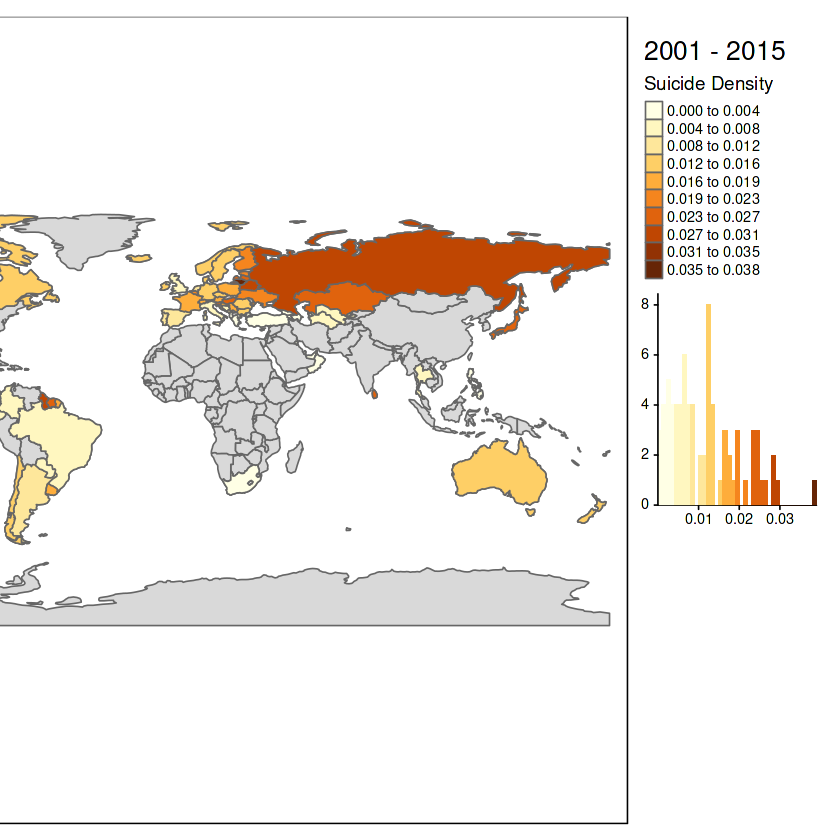

In [5]:
tmap_arrange(wsui,asp = 1.1) 

The figure above is the World map of the suicide density in 2001 – 2015. High scores (darker – Dark Orange) represents a higher suicide density than low scores (lighter – Pale Yellow).

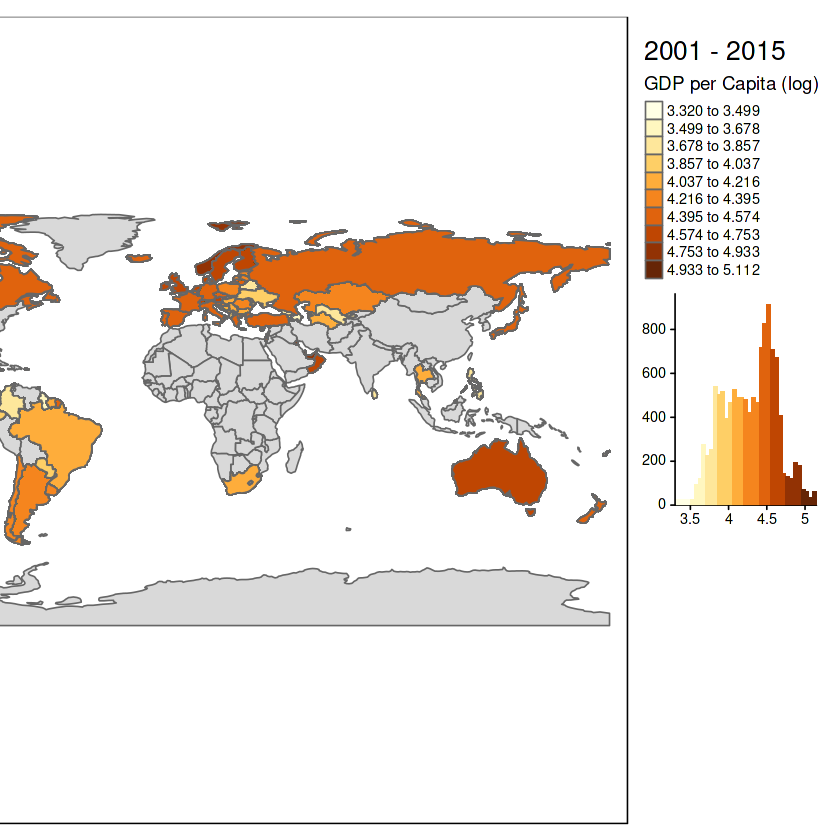

In [6]:
tmap_arrange(wgdp,asp = 1.1) 

The figure above is the World map of GDP per Capita (log) in 2001 – 2015. High scores (darker – Dark Orange) represents a higher GDP per Capita (log) than low scores (lighter – Pale Yellow).

Regarding the first graphical analysis, the choropleth for Suicide Density (Figure 1) and GDP per capita (Figure 2) are compared. The countries with darkest colour are Russia in Europe and Guyana in South America in terms of highest suicide density. However, these countries are in accord with middle range or even in a lower range GDP per capita respectively. Taking Australia as an example, it has a moderate degree of suicide density, in line with a larder GDP per capita. It is not always the case that country with high GDP per capita would has a higher suicide density. As there are regional difference in either suicide density and GDP per capita, relationship between GDP per capita and suicide density cannot easily be observed through choropleth. Further investigation must carry out to find out the relationship in between.

A linear model is applied to the GDP per capita variable and suicide density variable. GDP per capita is the response variable whilst suicide density is the explanatory variable. Figure 3 – plot a) demonstrates a week negative correlation between these two variables. It indicates that there is a slight decrease in GDP per capita while suicide density is higher. It should be considered that it is not naturally reflecting any causal relationship between the variables.


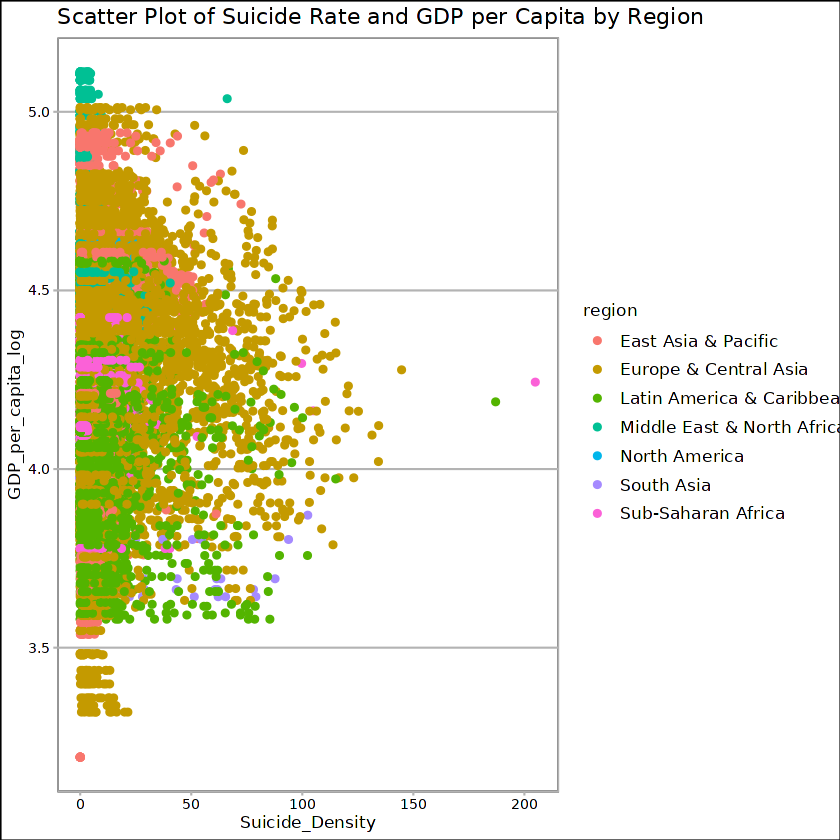

Empirical CDF 
Call: ecdf(wgdp_suicide1)
 x[1:13836] = -3.8948, -3.8611, -3.6252,  ..., 3.6063, 3.7767

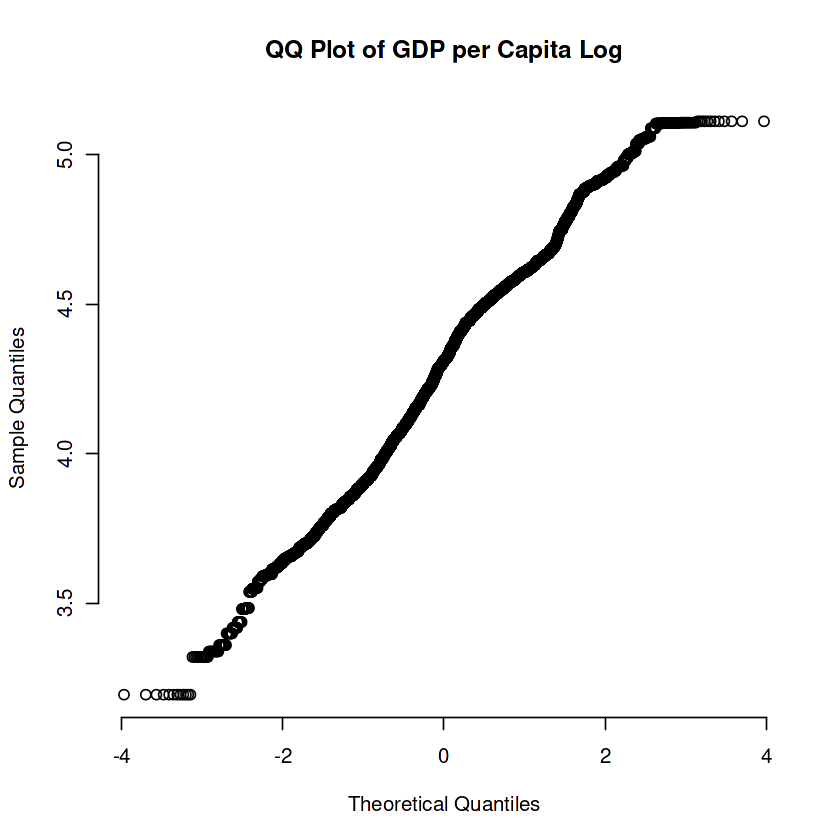

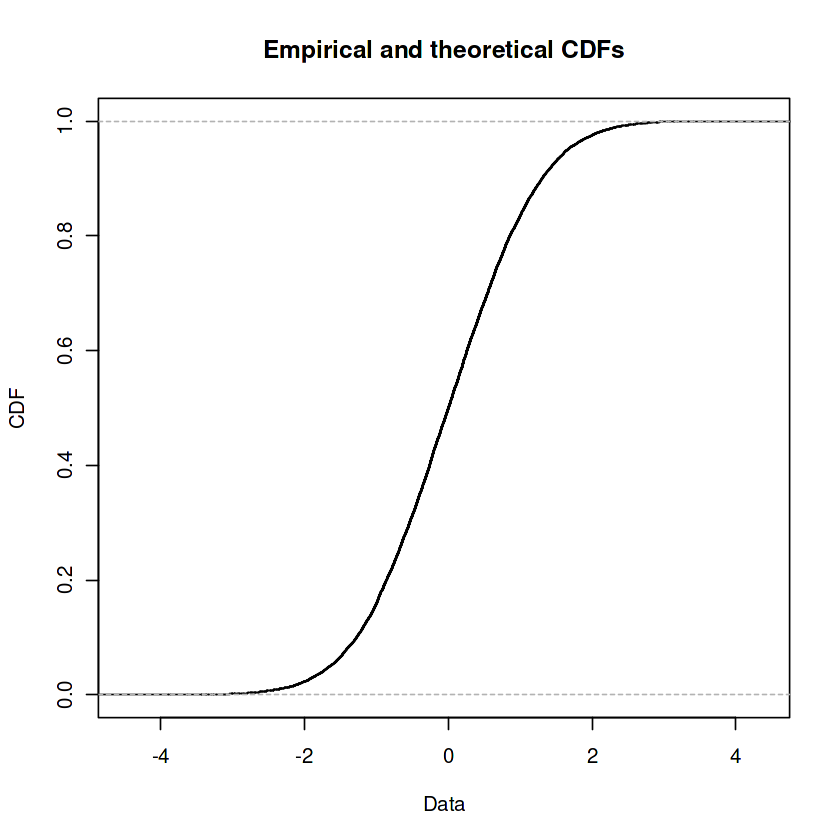

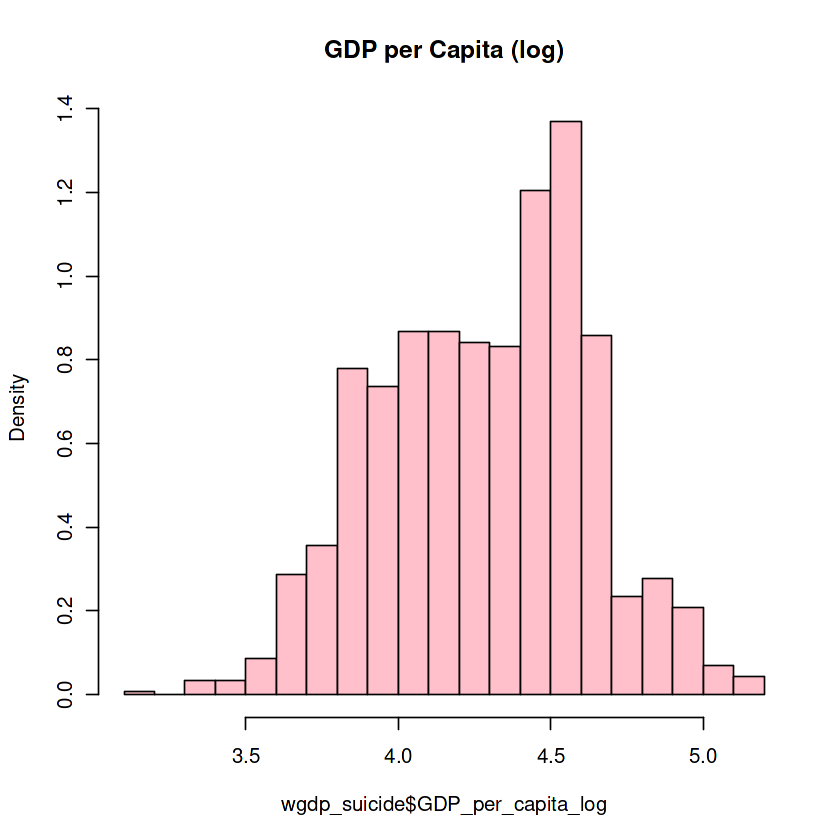

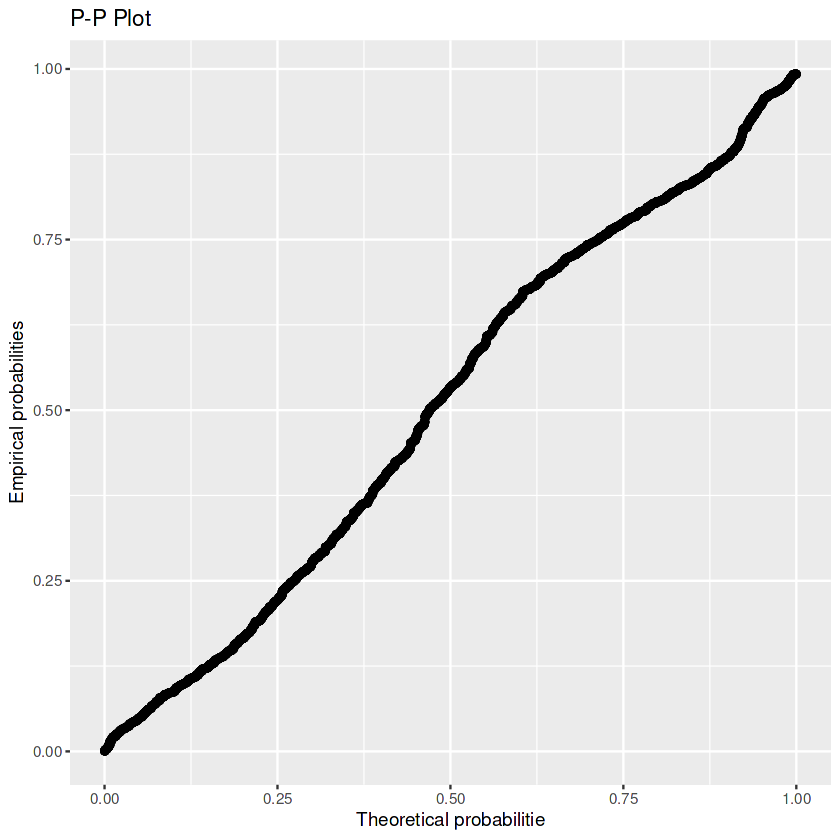

In [7]:
# Scatter plot of dataset
ggplot(wgdp_suicide, 
       aes(x = Suicide_Density, 
           y = GDP_per_capita_log,
           col = region)) + 
  geom_jitter() + 
  ggthemes::theme_calc()+
  ggtitle("Scatter Plot of Suicide Rate and GDP per Capita by Region") 

# Normal QQ Plot
qqnorm(wgdp_suicide$GDP_per_capita_log,pch = 1, frame = FALSE, main = "QQ Plot of GDP per Capita Log")

# Empirical and theoretical CDFs
wgdp_suicide1 = rnorm(wgdp_suicide$GDP_per_capita_log)
s = ecdf(wgdp_suicide1)
s
plot(s, xlab='Data', ylab='CDF', main='Empirical and theoretical CDFs') 

# Distribution of the response variable ~ close to a normal distribution
hist(wgdp_suicide$GDP_per_capita_log, freq = FALSE, main = "GDP per Capita (log)", col="pink")

#PP Plot
gdpm <- mean(wgdp_suicide$GDP_per_capita_log)
gdps <- sd(wgdp_suicide$GDP_per_capita_log)
gdpn <- nrow(wgdp_suicide)
gdpp <- (1 : gdpn) / gdpn - 0.5 / gdpn
ggplot(wgdp_suicide) + 
  geom_point(aes(x = gdpp, y = sort(pnorm(GDP_per_capita_log, gdpm, gdps)))) +
  ylab("Empirical probabilities") +
  xlab("Theoretical probabilitie") +
  ggtitle("P-P Plot")

The distribution of the response variable suicide density must be determined before applying the linear mixed models. To do this, several distributions, includes normal, lognormal, exponential, Cauchy, gamma, logistic, and Weibull distributions, were examined to the data and the best match was chosen. The normal distribution matches the data well in terms of the density function, the cumulative distribution function, the Q-Q plot, and the P-P plot, as shown in Figure 5. This is the greatest option when compared to the other distributions, however the logistic and Weibull distributions are also viable options. Now that the distribution has been recognized as normal, a linear mixed-effects model may be developed.

linear mixed models were investigated in total: The first was a random intercept model that controlled for region (lmer1), the second a random intercept and random slope model that controlled for region (lmer2), the third a random intercept model that controlled for region and nested random effects of country (lmer3). This suggests that at least one linear combination of effects has a variance of zero or close to zero.

A linear model is applied to the GDP per capita variable and suicide density variable. GDP per capita is the response variable whilst suicide density is the explanatory variable. Figure 3 – plot a) demonstrates a week negative correlation between these two variables. It indicates that there is a slight decrease in GDP per capita while suicide density is higher. It should be considered that it is not naturally reflecting any causal relationship between the variables.

### Regression model


Call:
lm(formula = GDP_per_capita_log ~ Suicide_Density, data = wgdp_suicide)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09084 -0.26026  0.02889  0.25722  0.82806 

Coefficients:
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      4.2844235  0.0035129 1219.610   <2e-16 ***
Suicide_Density -0.0001857  0.0001693   -1.097    0.273    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3412 on 13834 degrees of freedom
Multiple R-squared:  8.697e-05,	Adjusted R-squared:  1.469e-05 
F-statistic: 1.203 on 1 and 13834 DF,  p-value: 0.2727


`geom_smooth()` using formula 'y ~ x'



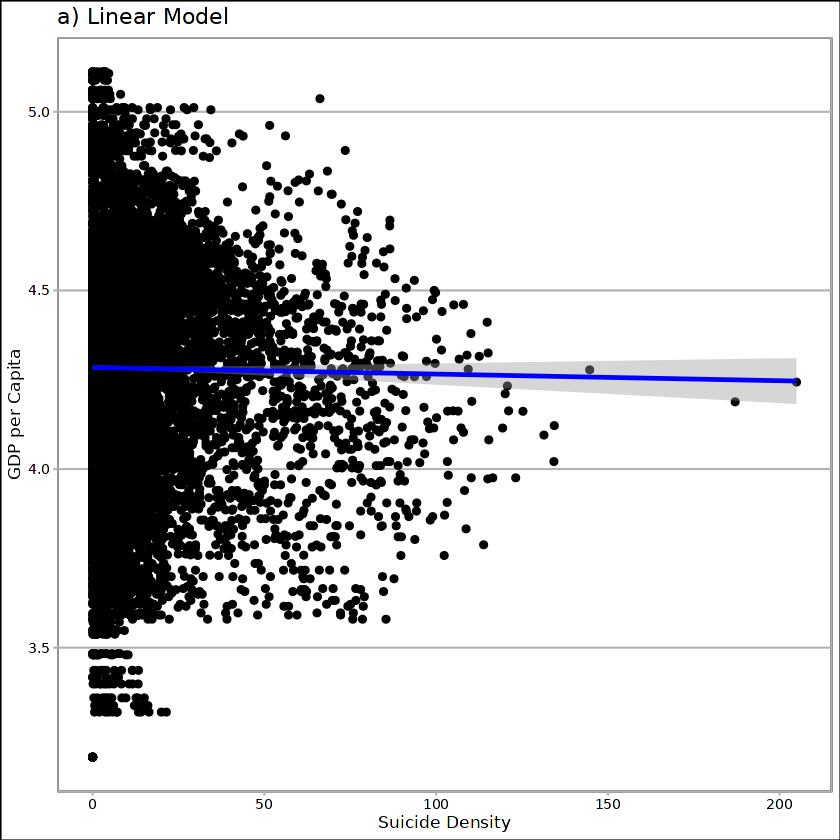

In [8]:
# #Regression model
sui_gdplm <- lm(GDP_per_capita_log ~ Suicide_Density, data = wgdp_suicide)
summary(sui_gdplm)

lm1 <- ggplot(data = wgdp_suicide, aes( x = Suicide_Density, y = GDP_per_capita_log)) +
        geom_point() +
        stat_smooth(method = "lm", col = "blue") +
        xlab("Suicide Density") +
        ylab("GDP per Capita") +
        ggthemes::theme_calc()+
        ggtitle("a) Linear Model")

lm1

### Fixed Effect Model to allow each country to have its own intercept and slope


Call:
lm(formula = GDP_per_capita_log ~ Suicide_Density + region * 
    Suicide_Density, data = wgdp_suicide)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.14687 -0.18451  0.03321  0.20445  1.24775 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                       4.3404541  0.0107103 405.261
Suicide_Density                                   0.0056312  0.0007063   7.973
regionEurope & Central Asia                      -0.0033797  0.0116035  -0.291
regionLatin America & Caribbean                  -0.2543879  0.0121376 -20.959
regionMiddle East & North Africa                  0.3878277  0.0154254  25.142
regionNorth America                               0.2324696  0.0403374   5.763
regionSouth Asia                                 -0.3981151  0.0282636 -14.086
regionSub-Saharan Africa                         -0.2063908  0.0174822 -11.806
Suicide_Density:regionEurope & Central Asia      -0.0059597

`geom_smooth()` using formula 'y ~ x'



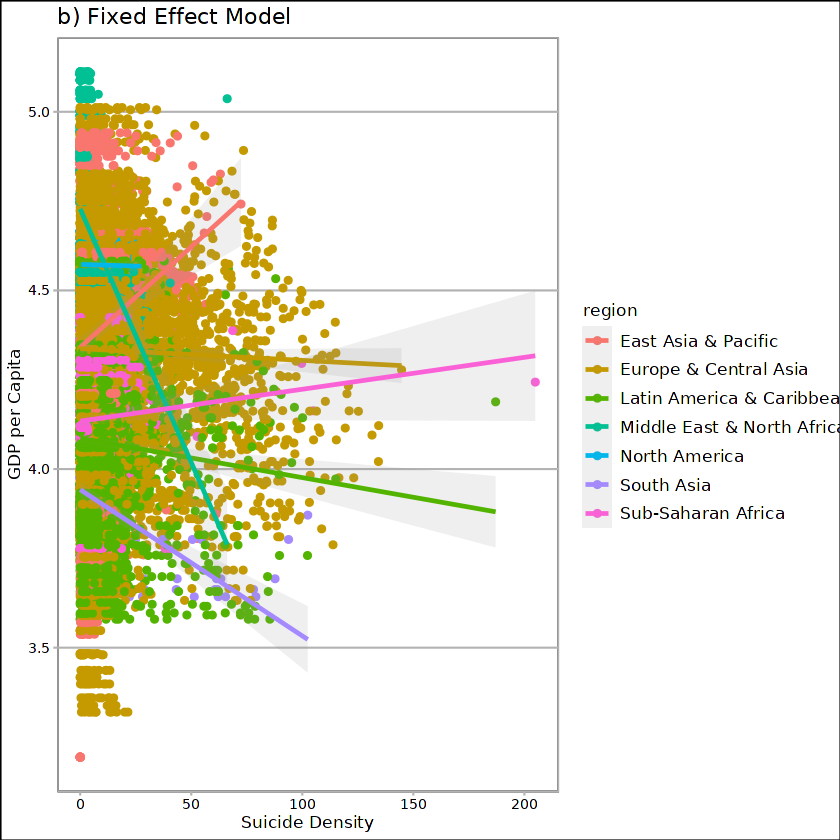

In [9]:
# Fixed Effect Model to allow each country to have its own intercept and slope
sui_gdpfelm <- lm(GDP_per_capita_log ~ Suicide_Density + region*Suicide_Density,data = wgdp_suicide )
summary(sui_gdpfelm)

lm2 <- ggplot(data = wgdp_suicide, aes(x = Suicide_Density, y = GDP_per_capita_log, col = region)) +
        geom_point() +
        stat_smooth(method = "lm", aes(col = region), alpha = 0.15) +
        xlab("Suicide Density") +
        ylab("GDP per Capita") +
        ggthemes::theme_calc()+
        ggtitle("b) Fixed Effect Model")

lm2

A linear model is applied to the GDP per capita variable and suicide density variable. GDP per capita is the response variable whilst suicide density is the explanatory variable. Figure 3 – plot a) demonstrates a week negative correlation between these two variables. It indicates that there is a slight decrease in GDP per capita while suicide density is higher. It should be considered that it is not naturally reflecting any causal relationship between the variables.

### Hierarchical Modelling

In [10]:
library(lme4)
library(magrittr)
library(arm)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



arm (Version 1.13-1, built: 2022-8-25)


Working directory is /kaggle/working




Linear mixed model fit by REML ['lmerMod']
Formula: GDP_per_capita_log ~ Suicide_Density + (1 | region)
   Data: wgdp_suicide

REML criterion at convergence: 5728.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0570 -0.6429  0.1410  0.7064  2.3063 

Random effects:
 Groups   Name        Variance Std.Dev.
 region   (Intercept) 0.07625  0.2761  
 Residual             0.08818  0.2970  
Number of obs: 13836, groups:  region, 7

Fixed effects:
                  Estimate Std. Error t value
(Intercept)      4.3025250  0.1045243  41.163
Suicide_Density -0.0003532  0.0001513  -2.335

Correlation of Fixed Effects:
            (Intr)
Suicd_Dnsty -0.013

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Computation failed in `stat_smooth()`:
No random effects terms specified in formula”


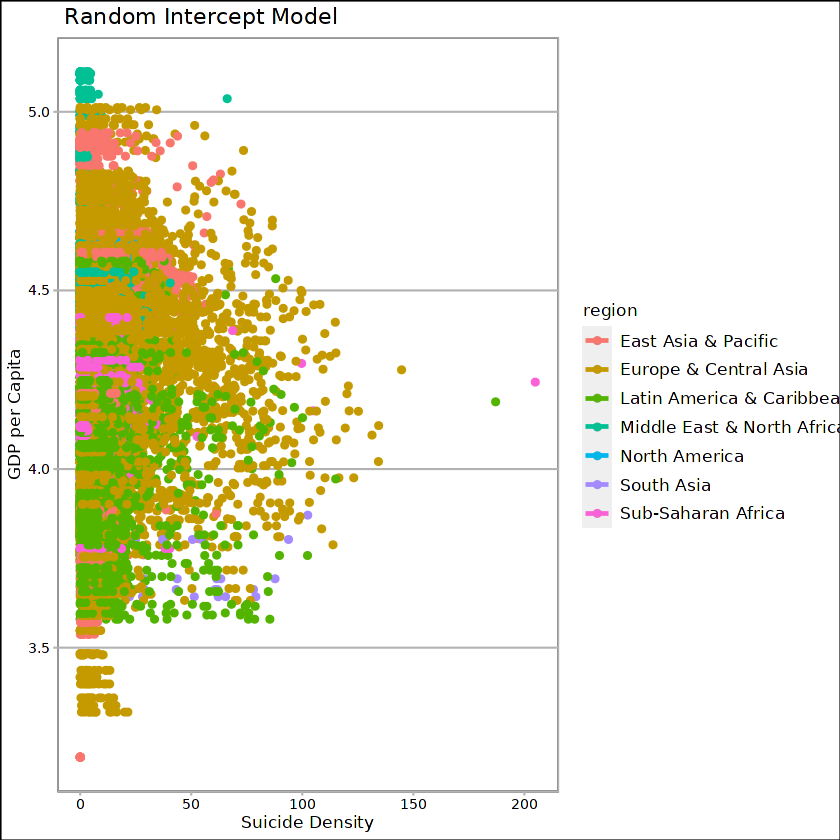

In [11]:
## Random Intercept Model
sui_gdplmer1 <- lmer(GDP_per_capita_log ~ Suicide_Density + (1|region), data = wgdp_suicide)
summary(sui_gdplmer1)
lmer1 <- ggplot(data = wgdp_suicide, aes(x = Suicide_Density, y = GDP_per_capita_log, col = region)) +
          geom_point() +
          stat_smooth(method = "lmer", aes(col = region), alpha = 0.15) +
          xlab("Suicide Density") +
          ylab("GDP per Capita") +
          ggthemes::theme_calc()+
          ggtitle(" Random Intercept Model")

lmer1

### Random Intercept and Random Slopes Model

Linear mixed model fit by REML ['lmerMod']
Formula: GDP_per_capita_log ~ Suicide_Density + (1 + Suicide_Density |  
    region)
   Data: wgdp_suicide
Control: lmerControl(optimizer = "nloptwrap")

REML criterion at convergence: 5596

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8870 -0.6266  0.1099  0.6921  4.0730 

Random effects:
 Groups   Name            Variance  Std.Dev. Corr 
 region   (Intercept)     7.698e-02 0.277460      
          Suicide_Density 3.584e-05 0.005987 -0.42
 Residual                 8.720e-02 0.295294      
Number of obs: 13836, groups:  region, 7

Fixed effects:
                 Estimate Std. Error t value
(Intercept)      4.306529   0.105117  40.969
Suicide_Density -0.001892   0.002317  -0.816

Correlation of Fixed Effects:
            (Intr)
Suicd_Dnsty -0.423

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Computation failed in `stat_smooth()`:
No random effects terms specified in formula”


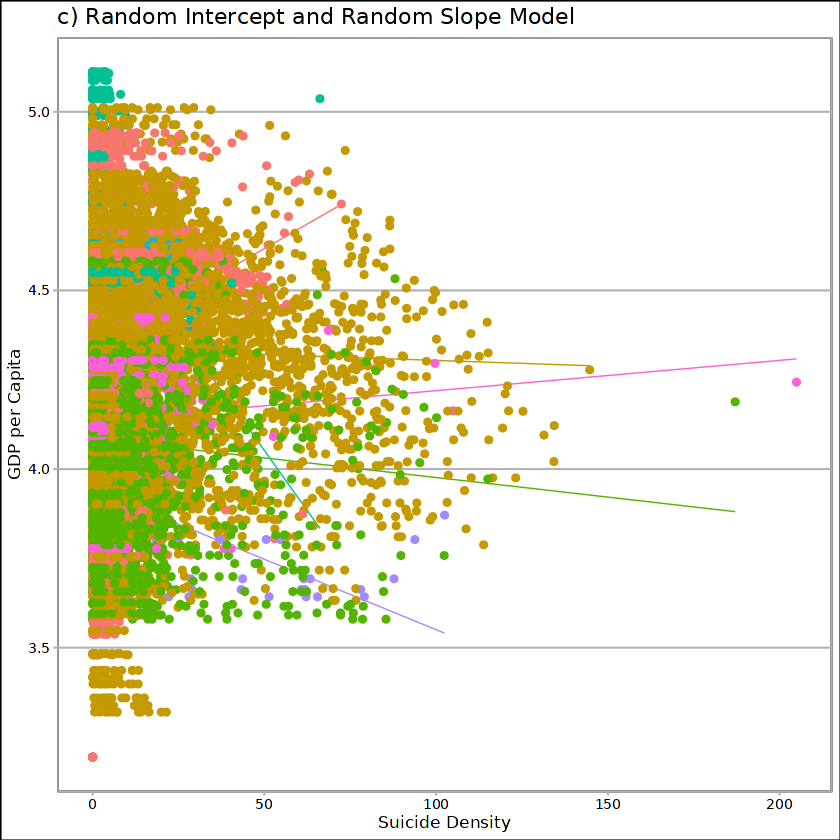

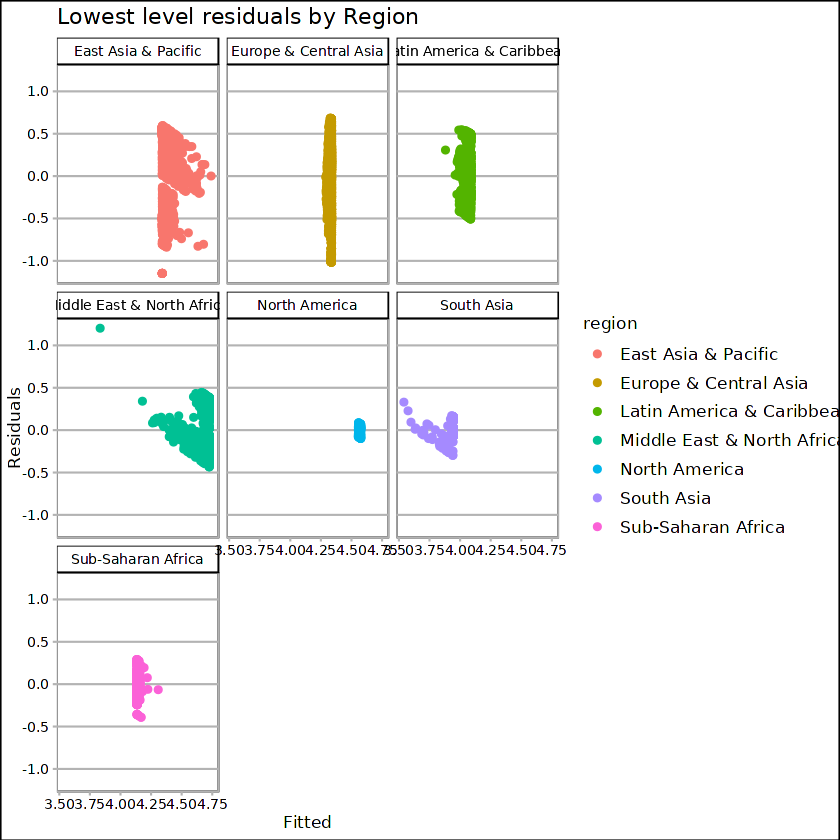

In [14]:
# Random Intercept and Random Slopes Model
sui_gdplmer2 <- lmer(GDP_per_capita_log ~ Suicide_Density + (1 + Suicide_Density|region), data = wgdp_suicide,
                     control = lmerControl(optimizer = "nloptwrap"))
summary(sui_gdplmer2)

# Plots predictions 
wgdp_suicide$sui_gdplmer.predictions <- predict(sui_gdplmer2)

lmer2 <- ggplot(aes(x = Suicide_Density, y = sui_gdplmer.predictions,
           color = region), data = wgdp_suicide) +
          geom_line(size =.3) +
          stat_smooth(method = "lmer", aes(col = region), alpha = 0.15) +
          geom_point(aes(y = GDP_per_capita_log)) +
          ylab("GDP per Capita") +
          xlab("Suicide Density") +
          ggthemes::theme_calc()+
          theme(legend.position='none')+
          ggtitle("c) Random Intercept and Random Slope Model")

lmer2

# Lowest level residuals by Country
sui_gdplmer2diag <- data.frame(Residuals = resid(sui_gdplmer2),
                               region = wgdp_suicide$region,
                               Fitted = fitted(sui_gdplmer2))

ggplot(data=sui_gdplmer2diag, aes(x = Fitted, y = Residuals, col=region)) +
  geom_point() +
  facet_wrap(~region) +
  ggthemes::theme_calc()+
  ggtitle("Lowest level residuals by Region")

### Nested Random Effect Model

Linear mixed model fit by REML ['lmerMod']
Formula: 
GDP_per_capita_log ~ Suicide_Density + (1 | region) + (1 | country:region)
   Data: wgdp_suicide

REML criterion at convergence: -25184.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7367 -0.6787  0.1502  0.6481  3.5951 

Random effects:
 Groups         Name        Variance Std.Dev.
 country:region (Intercept) 0.106631 0.32654 
 region         (Intercept) 0.052410 0.22893 
 Residual                   0.009019 0.09497 
Number of obs: 13836, groups:  country:region, 90; region, 7

Fixed effects:
                  Estimate Std. Error t value
(Intercept)      4.2515044  0.1028809  41.325
Suicide_Density -0.0004506  0.0000543  -8.298

Correlation of Fixed Effects:
            (Intr)
Suicd_Dnsty -0.005

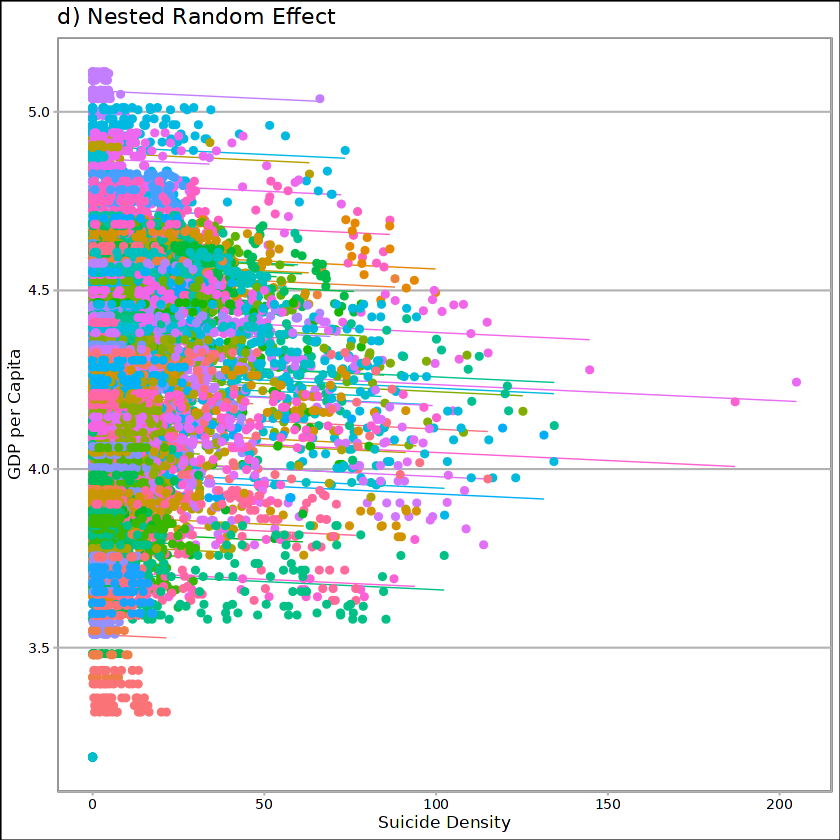

 Groups         Name        Variance 
 country:region (Intercept) 0.1066315
 region         (Intercept) 0.0524103
 Residual                   0.0090195


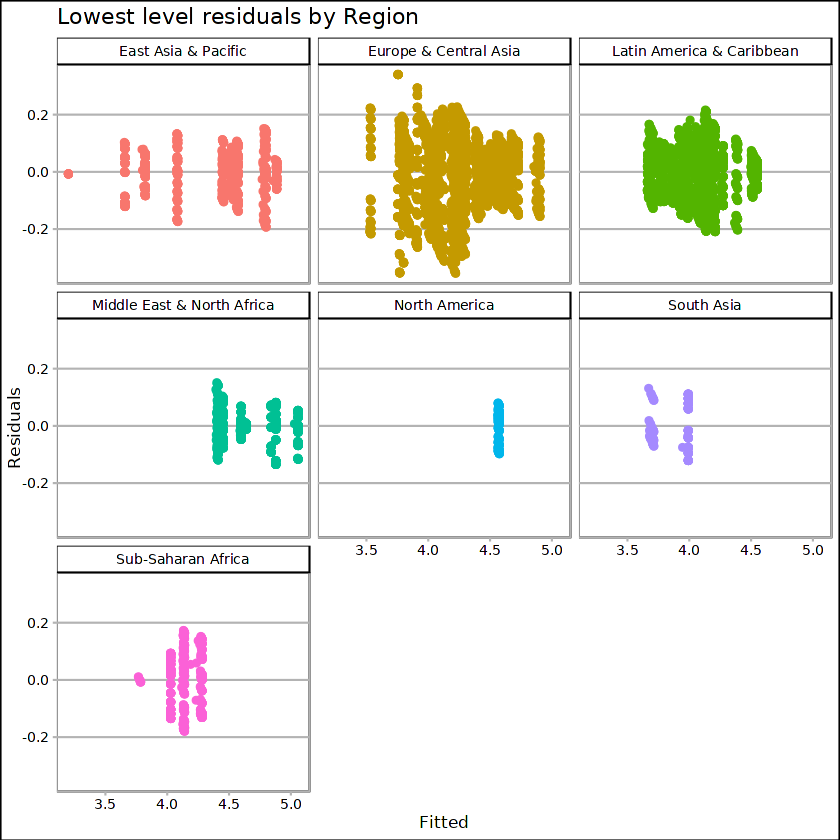

In [15]:
## Nested Random Effect Model
sui_gdplmer3 <- lmer(GDP_per_capita_log ~ Suicide_Density + (1|region) +(1|country:region), data = wgdp_suicide)
summary(sui_gdplmer3)

# Plots predictions 
wgdp_suicide$sui_gdplmer.predictions1 <- predict(sui_gdplmer3)

lmer3 <- ggplot(aes(x = Suicide_Density, y = sui_gdplmer.predictions1,
                    color = country), data = wgdp_suicide) +
  geom_line(size =.3) +
  geom_point(aes(y = GDP_per_capita_log)) +
  ylab("GDP per Capita") +
  xlab("Suicide Density") +
  ggthemes::theme_calc()+
  theme(legend.position='none')+
  ggtitle("d) Nested Random Effect")

lmer3

# Lowest level residuals by Region
sui_gdplmer3diag <- data.frame(Residuals = resid(sui_gdplmer3),
                               region = wgdp_suicide$region,
                               Fitted = fitted(sui_gdplmer3))

ggplot(data=sui_gdplmer3diag, aes(x = Fitted, y = Residuals, col=region)) +
  geom_point() +
  facet_wrap(~region) +
  ggthemes::theme_calc()+
  theme(legend.position='none')+
  ggtitle("Lowest level residuals by Region")

# Variance components of the hierarchical model
sui_gdp3vc <- VarCorr(sui_gdplmer3)
print(sui_gdp3vc, comp = "Variance")

# This reveals that the variance attributable to the intercept level is less than the residual error

### Anova function to compare two model

In [16]:
# Anova function to compare two model
anova(sui_gdplm,sui_gdpfelm)
anova(sui_gdplmer1, sui_gdplmer2, sui_gdplmer3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13834,1610.987,NA,NA,NA,NA
2,13822,1205.258,12,405.7293,387.7448,0


refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sui_gdplmer1,4,5718.404,5748.544,-2855.202,5710.404,NA,NA,NA
sui_gdplmer3,5,-25194.744,-25157.069,12602.372,-25204.744,30915.15,1,0
sui_gdplmer2,6,5594.653,5639.863,-2791.326,5582.653,0.00,1,1


### Regression table of the fixed effects of the Nested Random Effect Model

In [17]:
library(fitdistrplus)
library(stargazer)
class(sui_gdplmer3) <- "lmerMod"
stargazer(sui_gdplmer3, type = "text",
          digits = 3,
          star.cutoffs = c(0.05, 0.01, 0.001),
          digit.separator = "")

Loading required package: survival


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





                         Dependent variable:     
                    -----------------------------
                         GDP_per_capita_log      
-------------------------------------------------
Suicide_Density              -0.0005***          
                              (0.0001)           
                                                 
Constant                      4.252***           
                               (0.103)           
                                                 
-------------------------------------------------
Observations                    13836            
Log Likelihood                12592.060          
Akaike Inf. Crit.            -25174.130          
Bayesian Inf. Crit.          -25136.450          
Note:               *p<0.05; **p<0.01; ***p<0.001


Table above indicates the fixed effect of the random intercept model with nested random effect of model sui_gdplmer3. The statistically significant predictor is suicide density in accord to the response variable GDP per capita. With everything remain constant, if suicide density decreases by 0.0005 than GDP per capita increases by 4.252 units. The estimate of the linear model for Suicide Density is -0.0001857. it indicates that when everything remains unchanged, an unit decrease in suicide density would lead to an increase in GDP per capita by 4.284 units, which is slightly larger than that of the linger mixed model sui_gpdlmer3.  The adjusted intraclass correlation coefficient for model sui_gdplmer3 is 0.946, which refers to 94.6% of volatility in GDP is contributed to the statistical difference in terms of regional and country-wise aspects. 

## Hypothese Testing
Pearson's product-moment correlation for linear relationship 

β₁ is not significant, i.e., there is no relationship between x and y, therefore slope β₁ = 0.

0.95 confidence level by default

P-value < 0.05, we can reject the null hypothesis.

H0: The two variables are independent.

H1: The two variables relate to each other.

In the case of a null hypothesis, a chi-square test is to test the two variables that are independent.

0.95 significance level by default

p-value >0.05, accept null hypothesis to variables are independent


In [18]:
cor.test(~ GDP_per_capita_log + Suicide_Density, data = wgdp_suicide)



	Pearson's product-moment correlation

data:  GDP_per_capita_log and Suicide_Density
t = -1.097, df = 13834, p-value = 0.2727
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.025984817  0.007338017
sample estimates:
         cor 
-0.009325989 


As for hypothesis testing, a chi-square test is to test whether GDP per capita variable and suicide density variable that are independent, with 0.95 significance level by default. According to table 3, based on Pearson’s Chi-squared test, the p-value of 0.1176 is larger than 0.05, thus the null hypothesis is accepted that the two variables are independent. 

In [19]:
chisq.test(wgdp_suicide$GDP_per_capita_log, wgdp_suicide$Suicide_Density, correct = FALSE)


Warning message in chisq.test(wgdp_suicide$GDP_per_capita_log, wgdp_suicide$Suicide_Density, :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  wgdp_suicide$GDP_per_capita_log and wgdp_suicide$Suicide_Density
X-squared = 13422341, df = 13416192, p-value = 0.1176


Further to the hypothesis testing, Pearson's product-moment correlation is applied to investigate whether there is correlation between GDP per capita variable and suicide density variable, with 0.95 significance level by default. Refers to table 4, the p-value of 0.2727 is higher than 0.05, the null hypothesis should be accepted. It also suggested that there is a negative correlation of value -0.009326 between GDP per capita and suicide density variable.

## Limitations

First, the missing data were analysed, but they are omitted in this analysis, as replacing those missing data with random value may have an adverse effect on the analysis. Thus, for country like China with no information on suicide number, its data is missed out despite its relatively high GDP per capita. 

Secondly, this analysis focuses on investigating the correlation between GDP per capita and suicide density, whereas gender and age group are not computed due to simplicity of the analysis. 

Thirdly, the limitation of hypothesis testing. Because the results of significance tests are dependent on probabilities, they cannot be conveyed with complete confidence. When a test indicates that a difference is statistically significant, it simply means that the difference is unlikely to be attributable to chance. Statistical judgments based on significance tests cannot be regarded to be totally correct evidence of the hypothesis's veracity. This is especially true for small samples, when the likelihood of making incorrect assumptions is often higher. The size of the samples should be increased for higher dependability.


## Conclusion

The objective of this analysis was to examine the relationship between GDP per capita and suicide density. It applied data from both Worldwide suicide statistics and worldwide GDP. Choropleths analysis at the beginning of the analysis demonstrates some noticeable difference in either GDP per capita or suicide density among regions.

Hierarchical modelling is applied as the basic linear model could not illustrate the relationship between GDP per capita and suicide density. With comparison between linear mixed effect models and the linear model, it indicates that the linear model has a slightly overestimation on the relationship between variables. After correcting for variations at the regional and country levels, the association between GDP per capita and suicide density was substantially lower but remained statistically significant. It demonstrated a 94.6% interclass correlation coefficient of the better fitted linear mixed-effects model sui_gdplmer3.

All in all, this reports proves that studies that claim that country with middle – GDP per capita is associated to higher suicide numbers are not wrong. GDP per capita and suicide density is negatively correlated even after correcting for variations at the regional and country levels differences.
